# Polinomial

<Axes: >

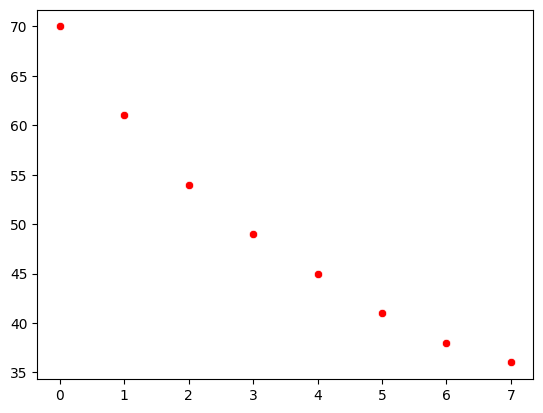

In [99]:
import numpy as np
import seaborn as sns

x_list = [0,1,2,3,4,5,6,7]
y_list = [70,61,54,49,45,41,38,36]
degree = 2

sns.scatterplot(x=x_list, y=y_list, color="r")

In [100]:
# create element of A matrix
def elem_a(j, i, x):
  sum_x = 0
  for xi in x:
    sum_x += xi**(j+i)
  return sum_x

# create A matrix
def calculate_a_matrix(n, x):
  matrix = []
  for j in range(n+1):
    row = []
    for i in range(n+1):
      # Python list begins form 0
      xij = elem_a(j, i, x)
      row.append(xij)
    matrix.append(row)
  return matrix

# create element of B matrix
def elem_b(j,x, y):
  sum_y = 0
  for iterator in range(len(x)):
    sum_y += y[iterator] * x[iterator]**(j)
  return sum_y

# create B matrix
def calculate_b_matrix(n, x, y):
  matrix = []
  for j in range(n+1):
    yij = elem_b(j, x, y)
    matrix.append([yij])
  return matrix

In [101]:
matrix_a = np.asmatrix(calculate_a_matrix(degree, x_list))
matrix_b = np.asmatrix(calculate_b_matrix(degree, x_list, y_list))

system_solution = np.linalg.inv(matrix_a).dot(matrix_b)

print("Matriz A:\n")
print(matrix_a)
print("\nMatriz B:\n")
print(matrix_b)
print("\nSolução do sistema:\n")
print(system_solution)

Matriz A:

[[   8   28  140]
 [  28  140  784]
 [ 140  784 4676]]

Matriz B:

[[ 394]
 [1181]
 [5595]]

Solução do sistema:

[[69.33333333]
 [-8.29761905]
 [ 0.51190476]]


<Axes: >

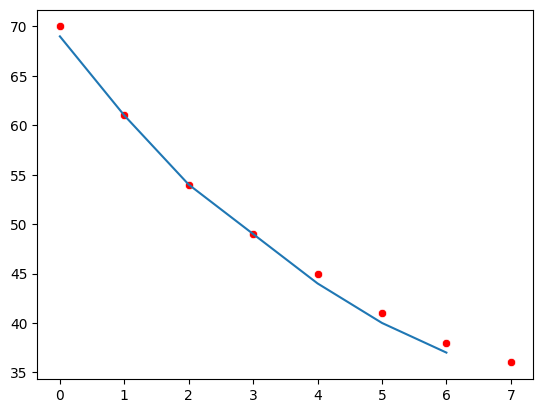

In [102]:
# Gera uma lista de X do 0 até o maior numero da lista * 2, com espaçamento de 1 em 1
generated_x_list = np.arange(0, max(x_list), 1)
range(max(x_list) * 2)
predicted_y = []
for xi in generated_x_list:
    y = 0
    for i in range(len(system_solution)):
        y += system_solution[i,0] * (xi ** i)
    predicted_y.append(int(y))

sns.scatterplot(x=x_list, y=y_list, color="r")
sns.lineplot(x=generated_x_list, y=predicted_y)